# First Lab

For this practice, you will need the following datasets:
- **Unemployment.dat**: dataset containing unemployment data from Spain from 2009 to 2020.
    - DATE: date of the sample
    - TOTAL: total number of unemployed people.

The main package for time series analysis in Python is **statsmodels**.

Further reading:
- [statsmodels](https://www.statsmodels.org/stable/index.html)

In addition, we will be using the following libraries:
- Data management
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)

- Plotting
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)


In [25]:
# For more information, check https://www.machinelearningplus.com/time-series/time-series-analysis-python/ 
### Load libraries ###
# interactive plotting
#%matplotlib inline
#%config InlineBackend.figure_format = 'svg' # ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’

# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
sns.set()

#Define figure sizes
#plt.rcParams.update({'figure.figsize': (8, 5), 'figure.dpi': 120})

# Data management libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from dateutil.parser import parse 

# Machine Learning libraries
from statsmodels.tsa.seasonal import seasonal_decompose, STL
# Others
import math

---
## 1. Read the dataset

In [31]:
# Import data
df = pd.read_csv('C:/Users/nicol/OneDrive/Documentos/VSCLocal_extra/VSCLocal_extra/Data/Unemployment.dat', parse_dates=['DATE'], dayfirst=True, sep=' ', index_col='DATE')
df.head()

,TOTAL
DATE,
2009-01-01,3327801
2009-02-01,3481859
2009-03-01,3605402
2009-04-01,3644880
2009-05-01,3620139


In [19]:
df = pd.read_csv('UnemploymentSpain.dat', sep="\t", parse_dates=['DATE'], dayfirst=True, index_col='DATE')
df.head()

,TOTAL
DATE,
2001-01-01,2017389
2001-02-01,1993273
2001-03-01,1981006
2001-04-01,1910453
2001-05-01,1898285


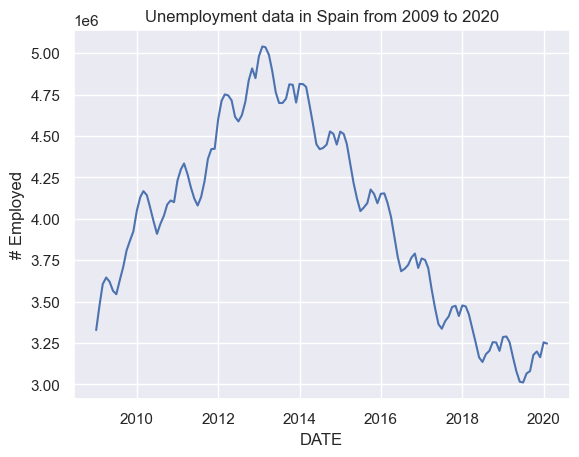

In [32]:
# Plotting a time series
fig, ax = plt.subplots()
ax.plot('TOTAL', data=df)
ax.set(title='Unemployment data in Spain from 2009 to 2020', xlabel='DATE', ylabel='# Employed')
plt.show()

In [33]:
# Extracting a portion of a time series
df_cut = df.loc['2015-03-01':]
df_cut = df.loc[:'2012-08-01']
df_cut = df.loc['2016-01-01':'2017-01-01']
df_cut

,TOTAL
DATE,
2016-01-01,4150755
2016-02-01,4152986
2016-03-01,4094770
2016-04-01,4011171
2016-05-01,3891403
2016-06-01,3767054
2016-07-01,3683061
2016-08-01,3697496
2016-09-01,3720297


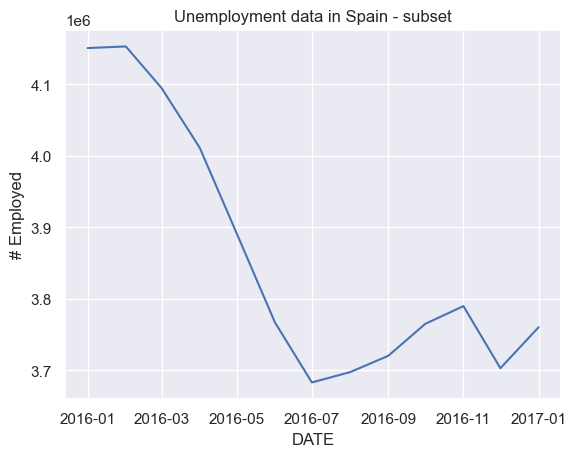

In [34]:
# Plotting subset time series
fig, ax = plt.subplots()
ax.plot('TOTAL', data=df_cut)
ax.set(title='Unemployment data in Spain - subset', xlabel='DATE', ylabel='# Employed')
plt.show()

---
# Decomposition methods

Additive model: 
 $$ y (t) = \tau (t) + \delta (t) + \epsilon (t) $$

The additive model in time series decomposition assumes that the seasonal fluctuations have a constant magnitude regardless of the level of the time series. This means that the seasonal pattern is consistent in its amplitude throughout the time series. If the seasonal pattern's amplitude remains relatively constant as the overall level of the time series changes, then the additive model is considered appropriate for decomposition

<Figure size 640x480 with 0 Axes>

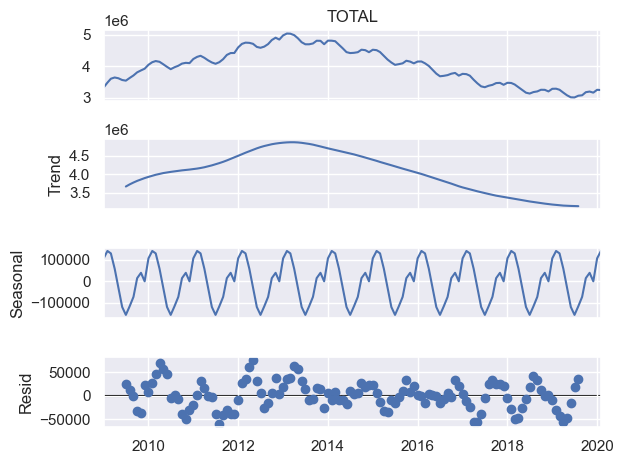

In [35]:
# Additive Decomposition
result_add = seasonal_decompose(df['TOTAL'], model='additive')
plt.figure()
result_add.plot()
plt.show()

To explain the multiplicative model in time series decomposition, we can use the following equation:

$$ y (t) = \tau (t) \times \delta (t) \times \epsilon (t) $$

The multiplicative model assumes that the seasonal fluctuations are proportional to the level of the time series. This means that the seasonal pattern's amplitude changes in proportion to the level of the time series. If the seasonal pattern's amplitude changes in proportion to the level of the time series, then the multiplicative model is considered appropriate for decomposition.

<Figure size 640x480 with 0 Axes>

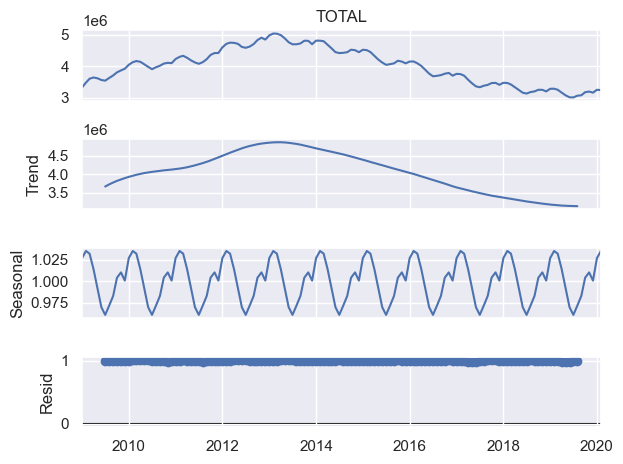

In [36]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['TOTAL'], model='multiplicative')
plt.figure()
result_mul.plot()
plt.show()

The STL (Seasonal-Trend decomposition using Loess) Decomposition is a method that decomposes a time series into three components: trend, seasonal, and residual. It is used to identify patterns and trends in time series data.

<Figure size 640x480 with 0 Axes>

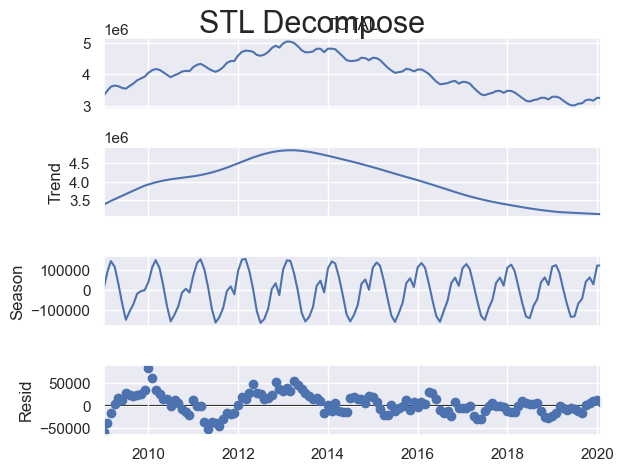

In [37]:
# STL ( Seasonal-Trend decomposition using Loess) Decomposition
stl = STL(df['TOTAL'], period=12)
result_stl = stl.fit()
plt.figure()
result_stl.plot().suptitle('STL Decompose', fontsize=22)
plt.show()

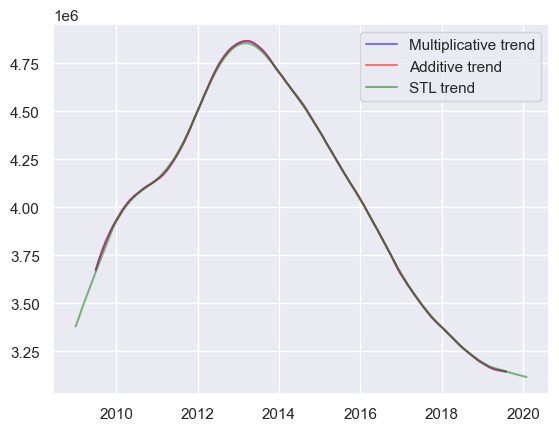

In [38]:
# Plot components together
plt.figure()
plt.plot(result_mul.trend, color='blue', alpha=0.5, label='Multiplicative trend')
plt.plot(result_add.trend, color='red', alpha=0.5, label='Additive trend')
plt.plot(result_stl.trend, color='green', alpha=0.5, label='STL trend')
plt.legend()
plt.show()

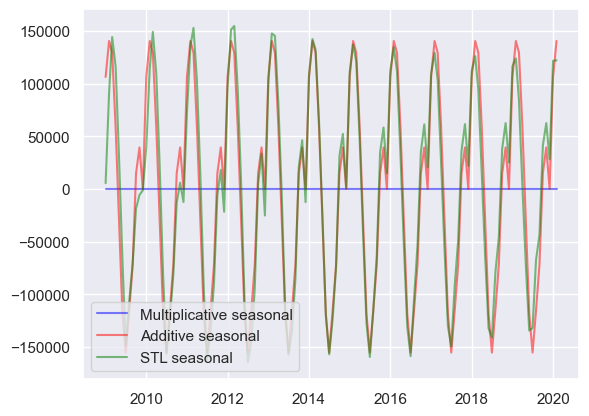

In [39]:
plt.figure()
plt.plot(result_mul.seasonal, color='blue', alpha=0.5, label='Multiplicative seasonal')
plt.plot(result_add.seasonal, color='red', alpha=0.5, label='Additive seasonal')
plt.plot(result_stl.seasonal, color='green', alpha=0.5, label='STL seasonal')
plt.legend()
plt.show()

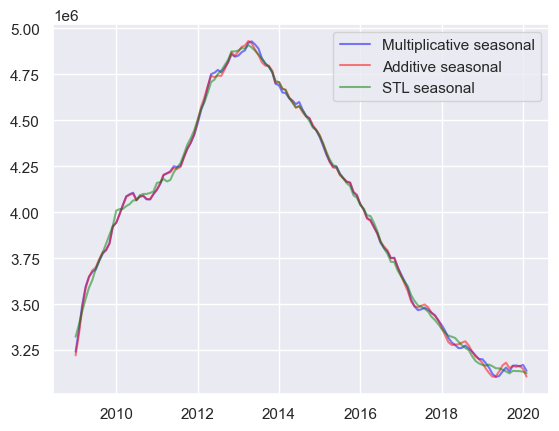

In [40]:
#Seasonal Adjusted series
plt.figure()
plt.plot(df['TOTAL']/result_mul.seasonal, color='blue', alpha=0.5, label='Multiplicative seasonal')
plt.plot(df['TOTAL']-result_add.seasonal, color='red', alpha=0.5, label='Additive seasonal')
plt.plot(df['TOTAL']-result_stl.seasonal, color='green', alpha=0.5, label='STL seasonal')
plt.legend()
plt.show()